# **Evolução**
<hr>

Com o instrumental básico que tivemos até aqui você pode então começar a explorar diferentes dados.

Neste capítulo vamos estar interessados em observar a evolução de um conjunto de dados, o comportamento de uma ou mais variáveis *dependentes*, com relação ao crescimento de uma outra variável (*variável independente*). Quando a evolução é observada ao longo do tempo, chamamos esse conjunto de *série temporal*. 

Vários conjuntos de dados de interesse apresentam essas características, como funções em geral e séries de dados históricas (série histórica de valores do PIB, número de internações diárias em um hospital, hits diários em um site de e-commerce ou a evolução das emissões de CO2 ao longo do tempo). 

Gráficos de linha, como os que empregamos até aqui, são comumente usados para observar a evolução dos dados. Mas antes de prosseguirmos vamos entender uma diferença entre gráficos de funções e gráficos que exploram dados em geral.

## Funções, Equações e Dados

Nos exemplos anteriores empregamos funções para aprender um conjunto de comandos essencias para a produção de gráficos. Funções são um mapeamento em que para cada dado de entrada (uma ou mais variáveis independentes) corresponde uma única variável de saída (variável dependente). Muitas funções são modeladas por Equações, como os modelos físicos de força ($F = m \alpha$) ou da cinemática, mas há diversos modelos em diferentes áreas como engenharia, economia, biologia etc. e modelos mais complexos podem requerer todo um sistema de equações. 

## Modelo do Lançamento de um Projétil 

Embora esses modelos (equações) desempenhem um papel fundamental em muitos problemas, a análise de dados em geral emprega a coleta de dados reais que  diferem parcialmente dos modelos pela simplificação da realidade que adotam(desprezar o atrito por exemplo). Também é comum os dados apresentarem mais de um valor para uma mesma entrada de dados, como no caso de coleta de vários experimentos ou indivíduos, não sendo assim, neste caso, uma função no sentido matemático do termo (funções, por definição, apresentam sempre um único valor para a mesma entrada). Além disso, uma série de dados pode nem mesmo corresponder a qualquer modelo conhecido, bastando lembrar de dados da bolsa de valores, do PIB ou ainda da progressão de casos de Covid em uma população. 

O exemplo a seguir ilustra a diferença entre empregar modelos (equações), como fizemos até aqui, e o emprego de dados obtidos a partir de coleta. 

Neste exemplo empregamos o modelo físico de lançamento de um projétil. A posição do projétil ao longo da sua trajetória pode ser dado em função da sua velocidade inicial e o ângulo de lançamento do projétil:

$$ x = V_{0} cos(\alpha) t $$
$$ y = V_{0} sin(\alpha) t - g t^2 / 2 $$

o primeiro gráfico abaixo corresponde a essa trajetória teórica. 

Se você já acompanhou algum experimento em um laboratório de física ou química, pode imaginar que uma coleta de dados de vários lançamentos do projeto deve produzir resultados ligeiramente diferente, seja por elementos não considerados no modelo como atrito, velocidade do ar etc. seja por imprecisões na tomada das medidas. Simulamos então essas coletas adicionando ruído ao modelo teórico reproduzindo assim os dados 'reais' do experimento. Note para a exibição desses dados empregamos a função `plt.scatter` e não o `plot` de linhas. O *scatter plot* é um gráfico de dispersão dos dados. Ele não liga os pontos de dados por linhas e é útil para exibir como estão dispersos os valores dos dados com relação a duas variáveis. Falaremos mais sobre ele estudarmos relações dos dados, mas por hora ele será bastante útil para exibir dados nos quais buscamos observar ou contruir uma linha de tendência.

```{note}
O scatter plot é um gráfico de dispersão dos dados. Ele não liga os pontos de dados por linhas e é útil para exibir como estão dispersos os valores dos dados com relação a duas variáveis.
``` 







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [ ]:
# Cálculo da trajetória do projétil
def calc(iAngulo=45, iV0=100):
  angRAd = np.deg2rad(iAngulo)
  g = 9.8

  alcanceMax = round(((iV0**2) * np.sin(2*angRAd)) / g, 1)
  alturaMax = round((iV0**2) * (np.sin(angRAd))**2 / (2*g), 1)
  tempoTotal = round((((2*iV0) * np.sin(angRAd)) / g), 1)

  t = np.arange(0, tempoTotal, 0.25) 

  x = abs(iV0) * np.cos(angRAd) * t 
  y = (abs(iV0) * np.sin(angRAd) * t) - ((g*(t**2))/2)

  vx = abs(iV0) * np.cos(angRAd) * ( t*0 + 1 )
  vy = abs( abs(iV0) * np.sin(angRAd) * ( t*0 + 1 ) - g*t )
  return t,x,y,vx,vy

# Cálculo das trajetórias para lançamentos em ângulos de 45, 30 e 60 graus
t,x,y,vx,vy = calc(45)  
A = np.ones(len(t))*45
M = np.ones(len(t))
df_teorico = pd.DataFrame(zip(M,A,t,x,y), columns=['medida','angulo','t','x','y'])

t,x,y,vx,vy = calc(30)  
A = np.ones(len(x))*30
M = np.ones(len(t))
df_teorico = pd.concat([df_teorico, pd.DataFrame(zip(M,A,t,x,y), columns=['medida','angulo','t','x','y'])])

t,x,y,vx,vy = calc(60)
A = np.ones(len(x))*60
M = np.ones(len(t))
df_teorico = pd.concat([df_teorico, pd.DataFrame(zip(M,A,t,x,y), columns=['medida','angulo','t','x','y'])])

# Simulando medidas de 20 lançamentos adicionando ruído ao modelo teórico
df_real = pd.DataFrame()
for i in range(20):
  df_med = df_teorico.copy()
  df_med.medida = i
  df_med.x += df_med.x * np.random.normal(0,1,len(df_med))/65
  df_med.y += df_med.y * np.random.normal(0,1,len(df_med))/65
  df_real = pd.concat([df_real, df_med])


Dados do lançamento teórico e do lançamentos reais simulados:

In [ ]:
df_teorico.head()

,medida,angulo,t,x,y
0,1.0,45.0,0.00,0.000000,0.000000
1,1.0,45.0,0.25,17.677670,17.371420
2,1.0,45.0,0.50,35.355339,34.130339
3,1.0,45.0,0.75,53.033009,50.276759
4,1.0,45.0,1.00,70.710678,65.810678


In [ ]:
df_real.head() 

,medida,angulo,t,x,y
0,0,45.0,0.00,0.000000,0.000000
1,0,45.0,0.25,17.680541,17.335417
2,0,45.0,0.50,34.787743,34.246185
3,0,45.0,0.75,53.707878,49.749653
4,0,45.0,1.00,69.925801,64.491572


Gráficos dos dados de lançamento.

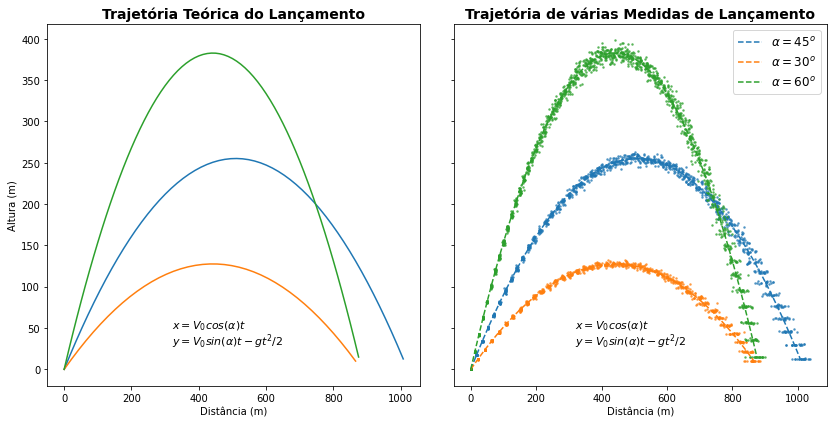

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)

# Gráficos
for ang in [45,30,60]:
  ax[0].plot(df_teorico[df_teorico.angulo == ang].x, df_teorico[df_teorico.angulo == ang].y, '-', label='$a_0 = $' + str(ang))

for ang in [45,30,60]:
  ax[1].scatter(df_real[df_real.angulo == ang].x, df_real[df_real.angulo == ang].y, s=2.5, alpha=0.6)    
  ax[1].plot(df_teorico[df_teorico.angulo == ang].x, df_teorico[df_teorico.angulo == ang].y, '--', label='$\\alpha = $' + str(ang) + '$^o$')

# Anotações
for i in range(2):
  ax[i].text(320, 50, '$ x = V_{0} cos(\\alpha) t $', fontsize=11)
  ax[i].text(320, 30, '$ y = V_{0} sin(\\alpha) t - g t^2 / 2 $', fontsize=11)
  ax[i].set_xlabel("Distância (m)")

ax[0].set_title("Trajetória Teórica do Lançamento", fontsize=14, weight='bold')
ax[1].set_title("Trajetória de várias Medidas de Lançamento", fontsize=14, weight='bold')  
ax[0].set_ylabel("Altura (m)")

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()



Como você pode notar o último gráfico não corresponde exatamente a uma função no sentido mais estreito do têrmo. Em especial, no caso das várias medidas, encontramos diferentes valores de $x$ e $y$ para os mesmos instantes de tempo. Não encontramos também a monotonicidade (dados crescentes ou descrecentes em um intervalo) ou a continuidade que normalmente exibem as funções, já que os pontos consideram um conjunto discreto e não contínuo de dados. 

**\[nota\]** Note que a rigor as funções $x$ e $y$ encontram-se em função de $t$, isto é $x(t), y(t)$. Exibimos entretanto gráficos de $x \times y$. Isso pode ser feito por haver uma correspondência direta do valor de $x$ e de $t$, enquanto também parece ser muito mais interessante exibir a trajetória dos lançamentos. Veja a tabela da função `df_teorico.head()`.

## Modelo de uma Turbina Eólica

Você talvez considere o modelo anterior muito elementar e que casos como esse não encontrem paralelo em casos mais práticos. Vamos então empregar um exemplo real. 

A seguir você encontra os dados de um modelo teórico da energia produzida por uma turbina heólica em função da velocidade do vento e os dados reais de turbinas obtidos à partir de medições. Aqui o modelo teórico é muito mais complexo do que modelo físico anterior e envolve várias equações, parâmetros da turbina e condições de funcionamento, como diâmetro da hélice, direção do vento etc. mas os dados reais são medidas diretas de turbinas em operação.

O modelo teórico é útil pois permite comparar o modelo com os dados reais como abaixo. 

In [ ]:
data_T_AA = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/T1_reshape_mean.csv')
 
data_T_AA.head()

,Index,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count,direction
0,1,3.5,43.46,70.58,27.12,38.02,29,N
1,2,4.0,88.01,127.57,39.56,31.60,101,N
2,3,4.5,160.51,217.01,56.50,26.42,102,N
3,4,5.0,274.71,335.67,60.96,18.44,99,N
4,5,5.5,388.60,465.84,77.24,16.79,119,N


In [ ]:
data_T_AA_mean.head()

,Unnamed: 0,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
0,0,3.5,52.191667,68.939167,16.745833,23.584167,56.250000
1,1,4.0,97.756667,127.686667,29.929167,23.646667,144.666667
2,2,4.5,183.601667,221.930000,38.327500,17.488333,149.500000
3,3,5.0,286.590833,336.426667,49.835000,14.937500,143.750000
4,4,5.5,400.392500,470.090833,69.699167,14.838333,167.666667


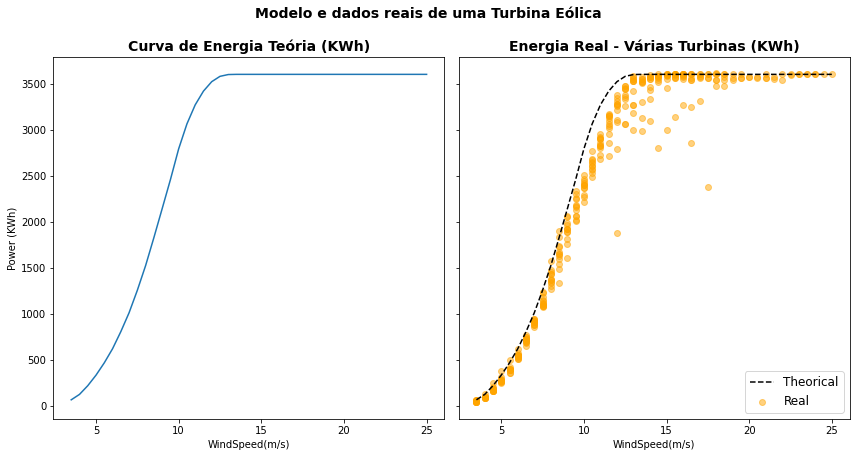

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)

fig.suptitle('Modelo e dados reais de uma Turbina Eólica', fontsize=14, weight='bold', y=1.05)

# Gráficos
ax[0].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"])

ax[1].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical')
ax[1].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

ax[0].set_title("Curva de Energia Teória (KWh)", fontsize=14, weight='bold')
ax[1].set_title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
ax[0].set_ylabel("Power (KWh)")

# Anotações
ax[0].set_xlabel("WindSpeed(m/s)")
ax[1].set_xlabel("WindSpeed(m/s)")

plt.legend(loc='lower right',fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()

O modelo permite observar como comportam-se as turbinas reais, no que se refere a energia produzida, com relação ao modelo teórico, e você pode reparar a dipersão dos valores das diferentes turbinas ou ainda os resultados abaixo do modelo teórico do fabricante para a faixa de velocidade entre 9-12 m/s.

## Covid, Bolsa e Google Trends

Mas ainda há uma classe de dados em que ainda é mais importante a visualização de dados. Diferentemente do conjunto de dados anterior onde existe um modelo teórico e um conjunto de dados reais, muitos dados não tem nenhum modelo teórico conhecido o que torna a análise e busca por padrões nesses dados talvez muito mais importante.

```{note}
Em muitos conjuntos de dados não temos um modelo teórico para acompanhar a evolução dos dados. Aqui, a visualização dos dados é ainda mais importante.
```

Os dados abaixo ilustram respectivamente a evolução de novos casos de Covid durante a pandemia de 2020, e dados do Ibovespa e de pesquisa de termos no Google (Google Trends). Para nenhum desses dados existe um modelo teórico conhecido, mas podemos à partir da visualização desses dados observar sua evolução e verificar hipóteses e possíveis causas para os comportamentos observados.

Este código apenas instala o pacotes para buscar dados do Google Trends e você pode querer empregá-lo para fazer suas próprias pesquisas.

In [ ]:
!pip install pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()

In [ ]:
pytrend.build_payload(kw_list=['Covid','Hotel','NetFlix','Notebook'], cat=0, timeframe='2020-02-25 2021-01-10', geo='BR')
trends = pytrend.interest_over_time()

trends.head()

,Covid,Hotel,NetFlix,Notebook,isPartial
date,,,,,
2020-03-01,2,40,36,16,False
2020-03-08,8,37,33,15,False
2020-03-15,59,20,62,19,False
2020-03-22,75,14,78,23,False
2020-03-29,67,14,70,23,False


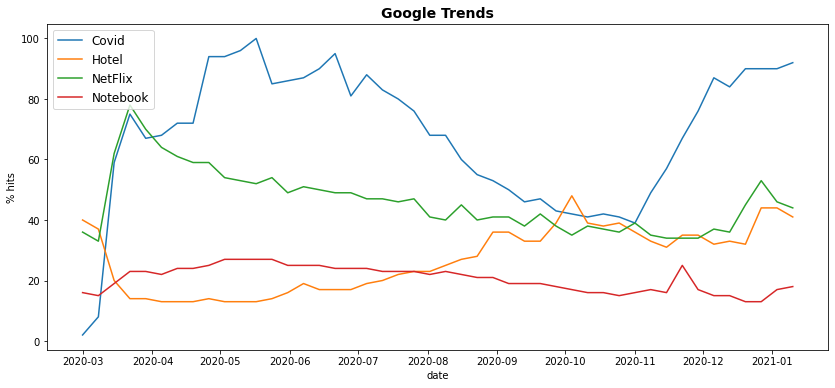

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

# Gráficos
ax.plot(trends.index, trends.Covid, label='Covid')
ax.plot(trends.index, trends.Hotel, label='Hotel')
ax.plot(trends.index, trends.NetFlix, label='NetFlix')
ax.plot(trends.index, trends.Notebook, label='Notebook')

# Anotações
from datetime import datetime

ax.set_title('Google Trends', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("% hits")

ax.legend(fontsize=12)
plt.show()

In [ ]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/mystocksn.csv')
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') # somente para ajustar formato da datas
bovespa.head()


,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


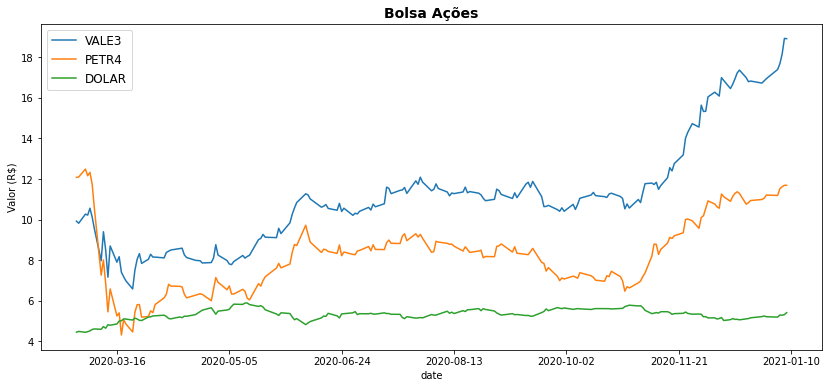

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.VALE3, label='VALE3')
ax.plot(bovespa.data, bovespa.PETR4, label='PETR4')
ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Bolsa Ações', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

In [ ]:
from datetime import datetime
corona_Brasil = pd.read_csv('http://meusite.mackenzie.br/rogerio/corona_Brasil.csv')
corona_Brasil.data = pd.to_datetime(corona.data, format='%Y-%m-%d',errors='coerce')

corona_Brasil.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9.0,210147125.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9.0,210147125.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9.0,210147125.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9.0,210147125.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN


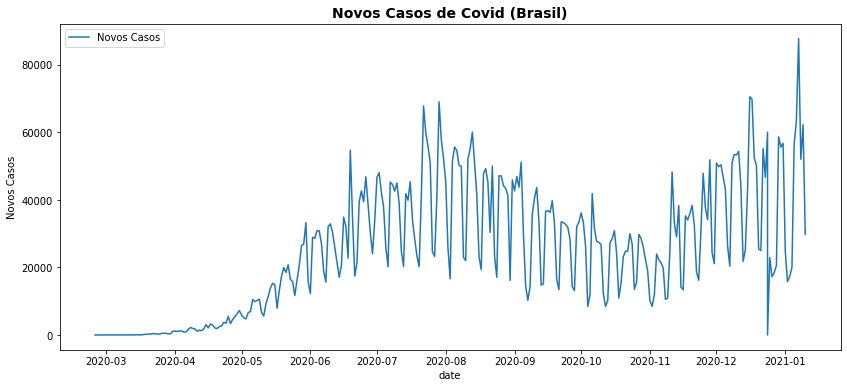

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(corona_Brasil.data, corona_Brasil.casosNovos, label='Novos Casos')

ax.set_title('Novos Casos de Covid (Brasil)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Novos Casos")

ax.legend()

plt.show()

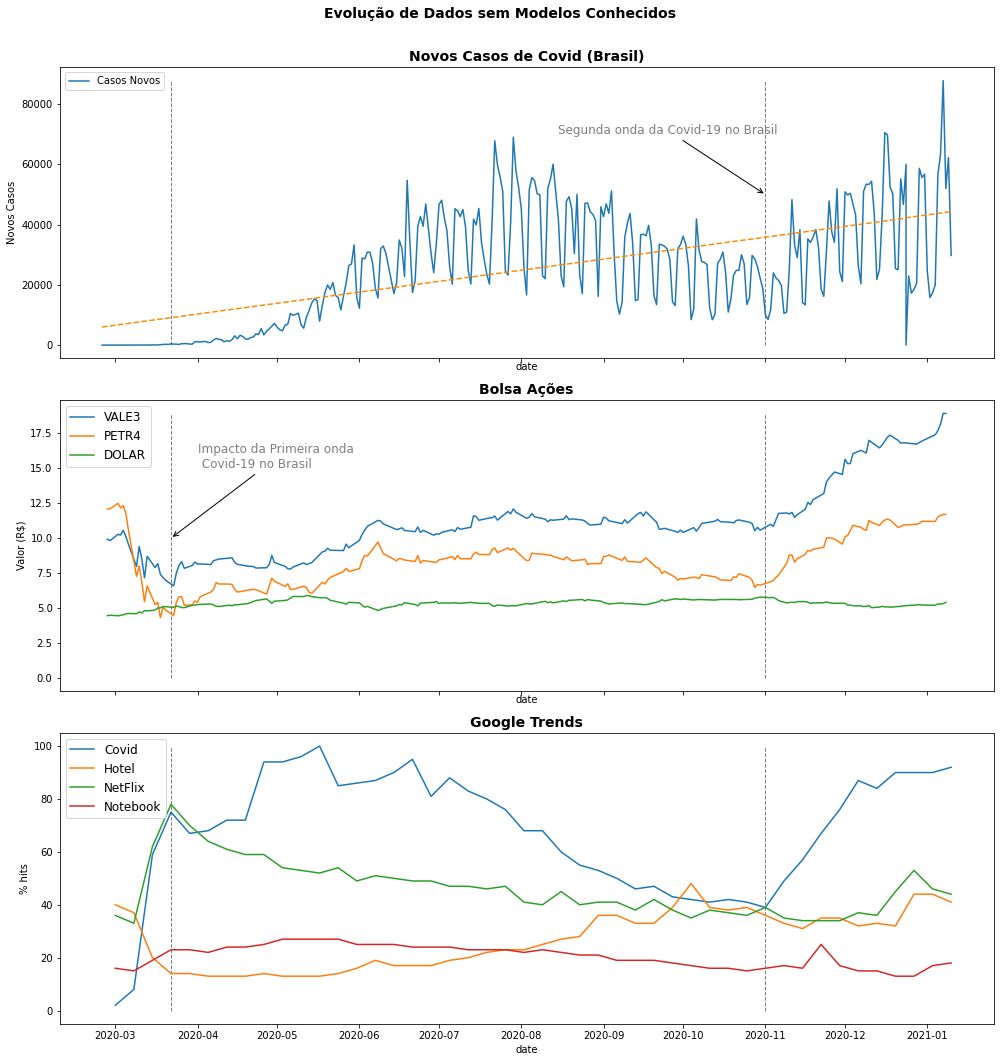

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(14,15), sharex=True)

fig.suptitle('Evolução de Dados sem Modelos Conhecidos', fontsize=14, weight='bold')

ax[0].plot(corona_Brasil.data, corona_Brasil.casosNovos, label='Casos Novos')

# Linhas verticais
ax[0].vlines(datetime(2020, 3, 22),0,corona_Brasil.casosNovos.max(),linewidth=1,linestyle='--',colors='grey') 
ax[0].vlines(datetime(2020, 11, 1),0,corona_Brasil.casosNovos.max(),linewidth=1,linestyle='--',colors='grey') 

ax[0].set_title('Novos Casos de Covid (Brasil)', fontsize=14, weight='bold')
ax[0].set_xlabel("date")
ax[0].set_ylabel("Novos Casos")

import numpy as np

x = np.arange(0,len(corona_Brasil),1)
z = np.polyfit(x, corona_Brasil.casosNovos, 1)
p = np.poly1d(z)
ax[0].plot(corona_Brasil.data,p(x),color='darkorange', linestyle='dashed')

# Annotate
ax[0].annotate('Segunda onda da Covid-19 no Brasil', 
             xy=(datetime(2020, 11, 1), 50000),  # ponto do gráfico
             xytext=(datetime(2020, 8, 15), 70000),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=12,
             color='grey') 

ax[0].legend()

ax[1].plot(bovespa.data, bovespa.VALE3, label='VALE3')
ax[1].plot(bovespa.data, bovespa.PETR4, label='PETR4')
ax[1].plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

# Linhas verticais
ax[1].vlines(datetime(2020, 3, 22),0,bovespa.VALE3.max(),linewidth=1,linestyle='--',colors='grey') 
ax[1].vlines(datetime(2020, 11, 1),0,bovespa.VALE3.max(),linewidth=1,linestyle='--',colors='grey') 

ax[1].set_title('Bolsa Ações', fontsize=14, weight='bold')
ax[1].set_xlabel("date")
ax[1].set_ylabel("Valor (R$)")

# Annotate
ax[1].annotate('Impacto da Primeira onda \n Covid-19 no Brasil', 
             xy=(datetime(2020, 3, 22), 10),  # ponto do gráfico
             xytext=(datetime(2020, 4, 1),15),  # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=12,
             color='grey')  

import matplotlib.ticker as ticker
ax[1].xaxis.set_major_locator(ticker.MaxNLocator(8))

ax[1].legend(fontsize=12)

ax[2].plot(trends.index, trends.Covid, label='Covid')
ax[2].plot(trends.index, trends.Hotel, label='Hotel')
ax[2].plot(trends.index, trends.NetFlix, label='NetFlix')
ax[2].plot(trends.index, trends.Notebook, label='Notebook')

# Linhas verticais
ax[2].vlines(datetime(2020, 3, 22),0,100,linewidth=1,linestyle='--',colors='grey') 
ax[2].vlines(datetime(2020, 11, 1),0,100,linewidth=1,linestyle='--',colors='grey') 


ax[2].set_title('Google Trends', fontsize=14, weight='bold')
ax[2].set_xlabel("date")
ax[2].set_ylabel("% hits")


ax[2].legend()

plt.legend(loc='upper left',fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

## Adicionando linhas de Tendência

Adicionar uma linha de tendência pressupõe fazermos algum tipo de modelo de regressão sobre os dados. Isso, em geral, envolve escolhermos um tipo de função (linear, polinomial, exponencial etc.) e, em seguida determinarmos os parâmetros dessa função a partir por exemplo de um método de otimização, como o de mínimos quadrados, para minimizar as distâncias dos dados com relação ao modelo escolhido. 

Como você pode ver essa pode ser uma tarefa bastante complexa e o `Matplotlib` não tem um função direta para produzir essas linhas de tendência e, mesmo outros pacotes fazem aproximações bastante simples (em geral modelos lineares). Mas podemos fazer uso de outros pacotes de aproximação de funções e, no final, a solução é bastante simples e flexível pois permite empregar muitos outros métodos de regressão, inclusive modelos sofisticados baseados em aprendizado de máquinas. 

Vamos começar com um conjunto de dados simples que já conhecemos, o quarteto de dados de Anscombe.

In [ ]:
import seaborn as sns

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


## Aproximando por um polinômio `np.polyfit()`

A função `np.polyfit()` do pacote `numpy` pode ser empregada para se obter os coeficientes de um polinômino de grau qualquer que melhor aproxima um conjunto de pontos. Se empregada com o grau 1 a aproximação irá corresponder ao modelo de **regressão linear** encontrando a melhor representação dos dados por uma reta.

O uso é bastante direto:

```
  z = np.polyfit(ds.x, ds.y, 2)
  p = np.poly1d(z)
```

A função `np.polyfit(x,y,<grau>)` é um otimizador e faz o cálculo dos coeficientes do polinômio que melhor aproxima (em geral menor erro quadrático médio) os dados x, y com o grau indicado. A função `p = np.poly1d(z)` retorna então o polinômio em forma de uma função que pode ser então aplicado a qualquer conjunto de dados. Um comando `x = np.arange()` pode ser empregado para gerar um intervalo de valores em que desejamos aplicar o polinômio `p`, para exibir uma linha contínua `plt.plot(x,p(x))`. 


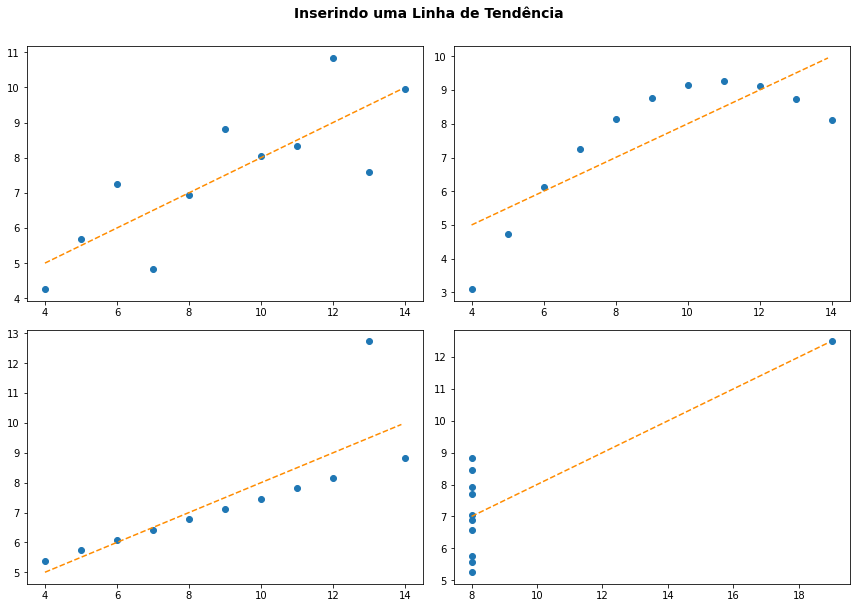

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  i += 1

plt.tight_layout()
plt.show()

Mas podemos empregar a função também para aproximação com polinômios de grau maior.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


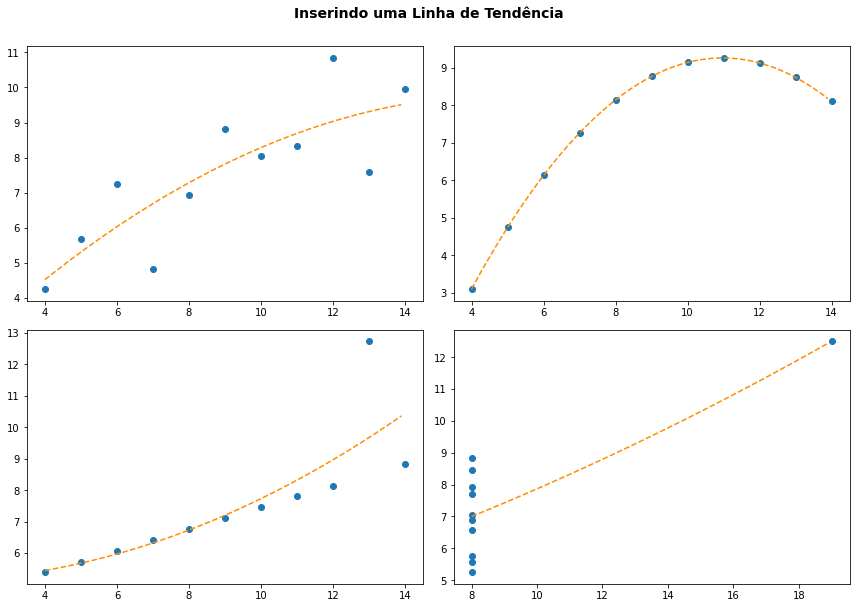

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 2)
  p = np.poly1d(z)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  i += 1

plt.tight_layout()
plt.show()

A vantagem desse método está em você poder empregar qualquer outros otimizadores e fazer a aproximação com funções arbitrárias de sua escolha, não ficando assim restrito aos modelos linear ou polinomial.

Por exemplo, o pacote `spicy` fornece um método `curve_fit()` para obter os coeficientes que melhor aproximam um conjunto de pontos a uma função arbitrária de sua escolha. Os parâmetros obtidos da função são retornados em `*popt` e podem ser empregados para aplicar a função a um intervalo de valores que você deseja empregar do mesmo modo que nos exemplos anteriores. 

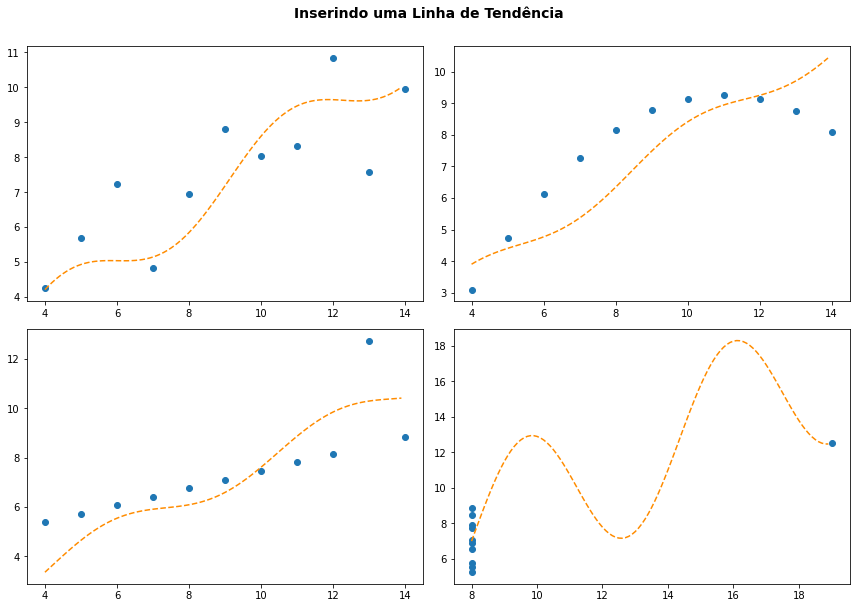

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*np.sin(x) + b*np.cos(x) + x**c

fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  popt, pcov = curve_fit(func, ds.x, ds.y)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)

  ax[i//2,i%2].plot(x,func(x,*popt),color='darkorange', linestyle='dashed')
  i += 1

plt.tight_layout()
plt.show()

Mas se para você for suficiente empregar um modelo linear e apenas buscar essa tendência nos dados, você pode querer empregar a função do pacote `seaborn`, `regplot()`. Essa função exibe a linha de tendência linear dos dados (regressão linear ou polinomial de grau 1) adicionando ainda o intervalo de confiança dos dados com o modelo obtido.

O uso é também bastante simples e você pode empregar o comando,

```
sns.regplot(x='x', y='y', data=df)
```

para exibir os pontos x e y de um dataframe df com a linha de regressão linear e o intervalo de confiança correspondente. 


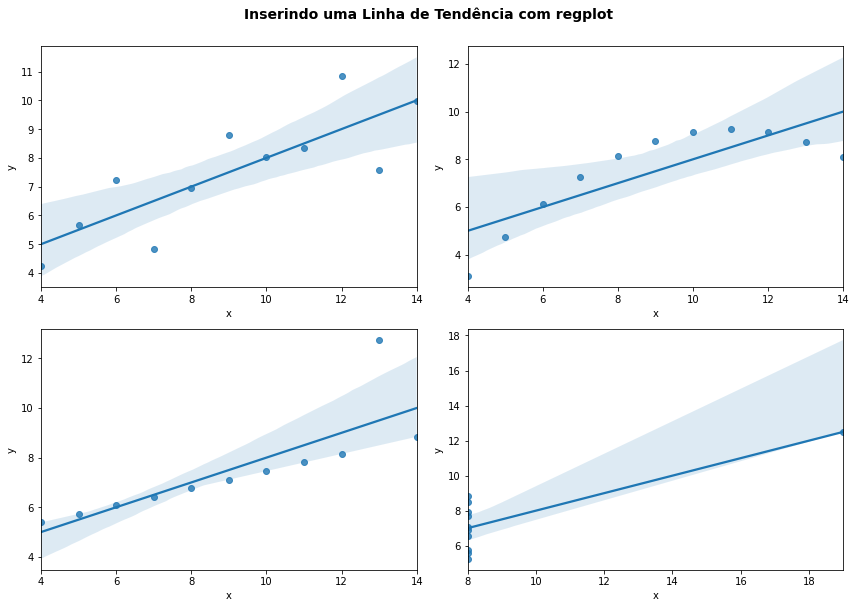

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Inserindo uma Linha de Tendência com regplot', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  sns.regplot(x='x', y='y', data=ds, ax=ax[i//2,i%2])
  i += 1

plt.tight_layout()
plt.show()

Você ainda pode querer pesquisar o gráfico `sns.lmplot()` do `seaborn` que combina as funções `regplot()` e `FacetGrid`, uma classe que ajuda a combinar  gráficos de diferentes subconjuntos de dados em vários painéis. O `Facegrid`é um recurso específico do `seaborn` e um recurso que não iremos explorar aqui, mas você pode consultar a documentação do `seabor` e experimentar o comando:

```
import seaborn as sns
sns.lmplot(x='x', y='y', col='dataset', data=df, scatter_kws={"s": 50, "alpha": 1})
plt.show()
```

Para exibir as linhas de tendência para os diferentes subconjuntos de dados tendo como filtro os diferentes valores do atributo `dataset`. 





regplot () executa um ajuste e gráfico de modelo de regressão linear simples. lmplot () combina regplot () e FacetGrid. A classe FacetGrid ajuda a visualizar a distribuição de uma variável, bem como a relação entre várias variáveis ​​separadamente dentro de subconjuntos de seu conjunto de dados usando vários painéis.

## Aplicando aos Dados do Modelo de uma Turbina Eólica

Vamos agora aplicar essas linhas de tendência ao nosso conjunto de dados de uma Turbina Eólica.

Reduzindo aos dados ao intervalo de valores antes do patamar de saturação, podemos fazer produzir as linhas de tendência linear e com um polinômio de grau 3. 


In [ ]:
data_T_AA = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/T1_reshape_mean.csv')

data_T_AA.head()


,Index,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count,direction
0,1,3.5,43.46,70.58,27.12,38.02,29,N
1,2,4.0,88.01,127.57,39.56,31.60,101,N
2,3,4.5,160.51,217.01,56.50,26.42,102,N
3,4,5.0,274.71,335.67,60.96,18.44,99,N
4,5,5.5,388.60,465.84,77.24,16.79,119,N


In [ ]:
data_T_AA_mean.head()

,Unnamed: 0,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
0,0,3.5,52.191667,68.939167,16.745833,23.584167,56.250000
1,1,4.0,97.756667,127.686667,29.929167,23.646667,144.666667
2,2,4.5,183.601667,221.930000,38.327500,17.488333,149.500000
3,3,5.0,286.590833,336.426667,49.835000,14.937500,143.750000
4,4,5.5,400.392500,470.090833,69.699167,14.838333,167.666667


In [ ]:
data_T_AA = data_T_AA[ data_T_AA["WindSpeed(m/s)"] < 12.5 ]
data_T_AA_mean = data_T_AA_mean[ data_T_AA_mean["WindSpeed(m/s)"] < 12.5 ]

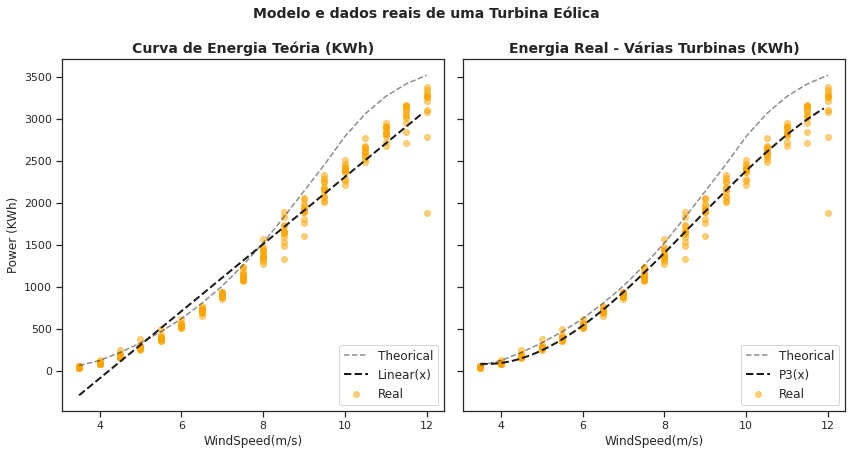

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,6),sharey=True)

fig.suptitle('Modelo e dados reais de uma Turbina Eólica', fontsize=14, weight='bold', y=1.05)

ax[0].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical', alpha=0.5)
ax[0].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

ax[1].plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"], '--k', label='Theorical', alpha=0.5)
ax[1].scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], label='Real', marker='o', color='orange', alpha=0.5)

x = np.arange(data_T_AA["WindSpeed(m/s)"].min(),data_T_AA["WindSpeed(m/s)"].max(), 0.1)

z = np.polyfit(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], 1)
p = np.poly1d(z)
ax[0].plot(x,p(x), linestyle='dashed', label='Linear(x)',linewidth=2, color='k')

z = np.polyfit(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], 3)
p = np.poly1d(z)
ax[1].plot(x,p(x), linestyle='dashed', label='P3(x)' ,linewidth=2, color='k')

ax[0].set_title("Curva de Energia Teória (KWh)", fontsize=14, weight='bold')
ax[1].set_title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
ax[0].set_ylabel("Power (KWh)")

ax[0].set_xlabel("WindSpeed(m/s)")
ax[1].set_xlabel("WindSpeed(m/s)")

ax[0].legend(loc='lower right',fontsize=12)
ax[1].legend(loc='lower right',fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.tight_layout()
plt.show()

Como você pode ver o ajuste linear oferece pouca aderência aos dados coletados. O modelo polinomial de grau 3, entrentanto, parece se ajustar até melhor que o próprio modelo teórico do fabricante.

## Tendências e Séries Temporais

Muitas vezes não esperamos encontrar um modelo tão próximo como no caso anterior, mas interessa-nos apenas buscar definir melhor uma tendência de crescimento ou decréscimos de valores. Nesses casos parece suficiente adotarmos simplesmente uma linha de tendência linear. Vamos ilustrar isso empregando o conjunto de dados de cotações de índice da bolsa. 

Aqui você vai encontrar um problema muito comum ao buscarmos tendências em dados temporais. Sua variável independente (a linha do tempo) não pode ser aplicada diretamente a uma regressão linear (ou outra qualquer) pois seus dados não são numéricos. Para fazer isso teremos de empregar um artifício e transformar a linha do tempo em um atributo numérico.

```{note}
Para construir linhas de tendência de dados temporais é necessário antes transformar a linha do tempo em um atributo numérico.
```

Isso pode ser feito simplesmente atribuindo a cada data do seu conjunto de dados um valor inteiro diferente a partir de 0. Se cada linha do conjunto de dados corresponde a uma data esse valor poderá ser o índice do seu conjunto de dados. 






In [ ]:
bovespa = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/mystocksn.csv')
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d',errors='coerce') # somente para ajustar formato da datas
bovespa.head()


,data,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,102984.0,9.92,12.08,4.4491
1,2020-02-28,104172.0,9.82,12.10,4.4848
2,2020-03-02,106625.0,10.27,12.49,4.4413
3,2020-03-03,105537.0,10.22,12.16,4.4724
4,2020-03-04,107224.0,10.56,12.33,4.5132


In [ ]:
bovespa.index

RangeIndex(start=0, stop=185, step=1)

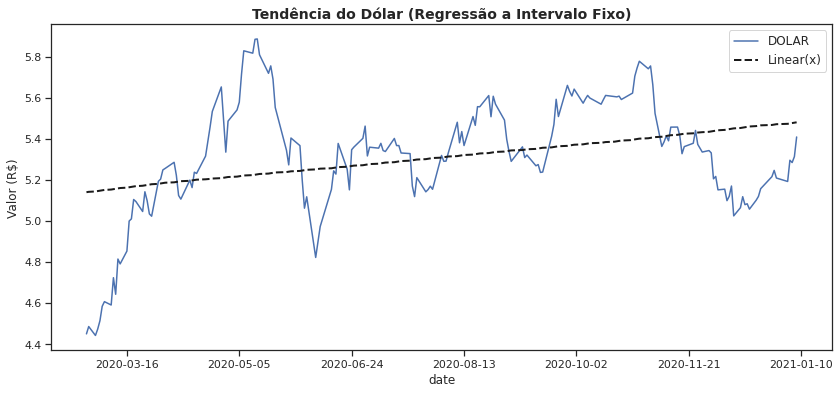

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

O procedimento acima atende um grande número de casos de interesse. Como temos um índice numérico 0-185 para as 186 diferentes datas empregamos o índice diretamente, mas podemos também criar um valor diferente para cada data empregando:

```
x = np.arange(0,len(bovespa),1)
```

e deixamos isso comentado no código acima como uma forma opcional.

Há entretanto uma série de detalhes quanto a isso. Por exemplo você pode ter intervalos de datas diferentes e, neste caso, pode ser necessário associar a cada data a distãncia em dias à menor data do conjunto de dados e não valores com um incremento fixo como acima. 

Mesmo no nosso exemplo, como os dados da bolsa referem-se somente a dias úteis há um intervalo de datas maior quando dos finais de semana e, embora os resultados sejam praticamente os mesmos aqui, a rigor precisáriamos empregar intervalos de data diferentes conforme a correspondente data e para outros casos isso pode realmente ser necessário. Fazemos esse procedimento incluindo uma variável que corresponde a quantidade de dias a partir da data inicial e a função `dt.days` permite transformar esses valores em numéricos para o cálculo da regressão.  

In [ ]:
bovespa['dias'] = bovespa['data'] - bovespa['data'].min()

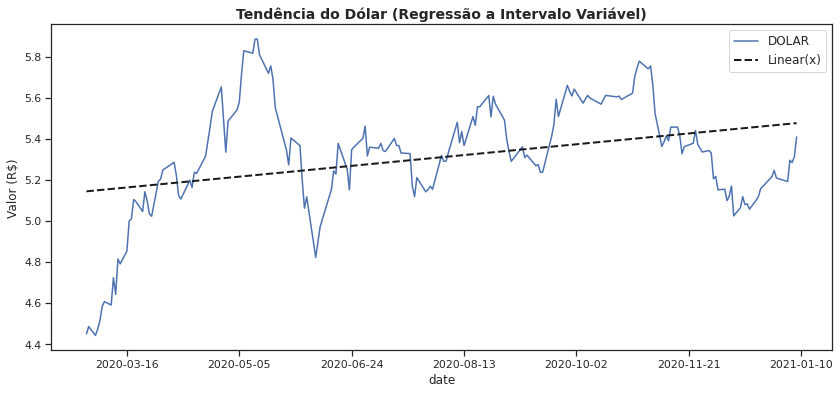

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Variável)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

## Trabalhando com Escalas Diferentes

Se você empregar agora diretamente o gráfico anterior para analisar a tendência não só do dólar como também do índice Bovespa o resultado não irá parecer dos melhores. Por que?

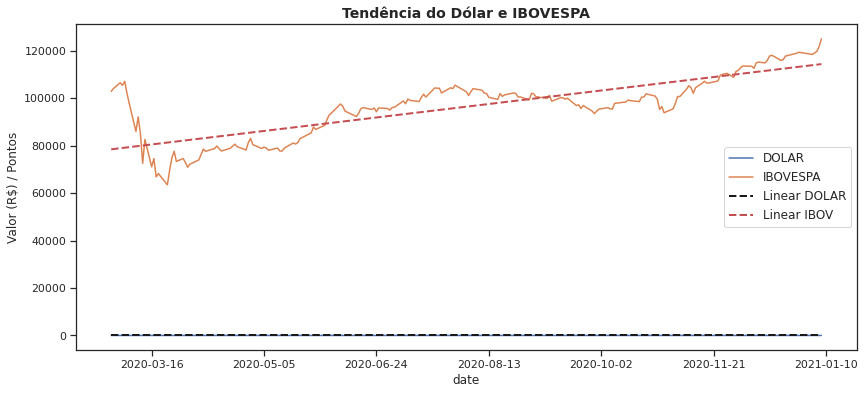

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')
ax.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA')

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$) / Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.IBOV, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Isso mesmo, como os dados estão em escalas de valores muito diferentes você não consegue, no mesmo gráfico, observar as variáveis do dólar que encontram-se em um intervalo de valor muito menor que os valores de índice Bovespa (na casa da dezena, enquanto o índice Bovespa é na casa dos milhares).

Podemos então empregar o comando `ax.twinx()` no modo Artist Layer para apresentar duas escalas diferentes no mesmo gráfico e podermos assim comparar a tendência das duas séries de dados. 

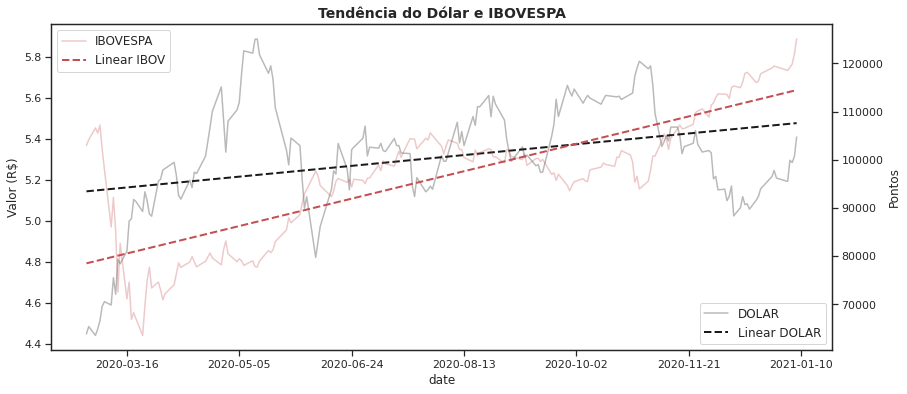

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR', color='k', alpha=0.3)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA', color='r', alpha=0.3)

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax2.set_ylabel("Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.IBOV, 1)
p = np.poly1d(z)
ax2.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(loc='lower right',fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Esse procedimento entretanto só é útil quando temos até duas escalas diferentes de dados. Havendo mais de duas escalas de dados a forma que podemos empregar é a normalização dos dados. Mas é necessário ter cuidado ao se fazer essas transformações nos dados e lembrar que não estamos mais observando os valores reaus dos dados, mas apenas seus movimentos relativos.

Existem vários formas de normalização e poderíamos aqui aplicar simplesmente uma normalização *min/max* dividindo cada valor pelo valor máximo de cada atributo, levando cada atributo para valores entre $[0,1]$. Mas vamos adotar um procedimento muito usado, e igualmente simples, e aplicar uma normalização normalmente conhecida como *standard scaler* que normaliza os valores a uma média 0 e desvio padrão 1.

$$ z = \frac{x - \bar{x}}{\sigma(x)}$$



In [ ]:
bovespa_norm = ( bovespa.drop(columns=['data','dias']) - bovespa.drop(columns=['data','dias']).mean() ) / bovespa.drop(columns=['data','dias']).std()
bovespa_norm = pd.concat([bovespa[['data','dias']], bovespa_norm],axis=1)
bovespa_norm.head()


,data,dias,IBOV,VALE3,PETR4,DOLAR
0,2020-02-27,0 days,0.488931,-0.464186,2.132811,-3.018888
1,2020-02-28,1 days,0.578304,-0.500953,2.144005,-2.893685
2,2020-03-02,4 days,0.762844,-0.335505,2.362293,-3.046244
3,2020-03-03,5 days,0.680993,-0.353888,2.177588,-2.937172
4,2020-03-04,6 days,0.807907,-0.228884,2.272739,-2.794083


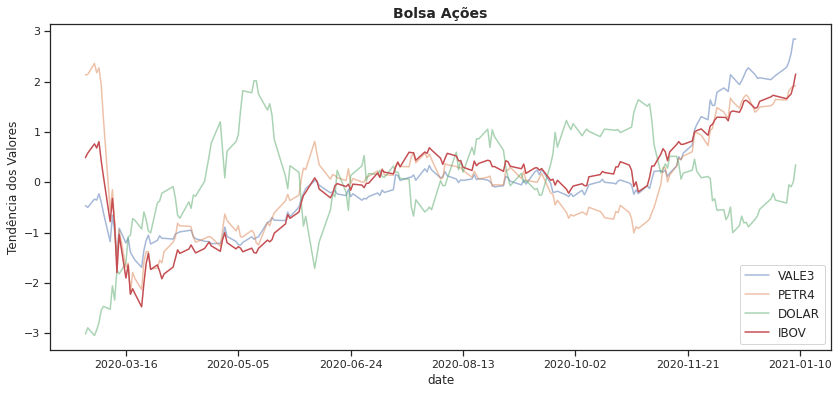

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa_norm.data, bovespa_norm.VALE3, label='VALE3', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.PETR4, label='PETR4', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.DOLAR, label='DOLAR', alpha=0.5)
ax.plot(bovespa_norm.data, bovespa_norm.IBOV, label='IBOV')

ax.set_title('Bolsa Ações', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Tendência dos Valores")

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

Nosso objetivo não é fazer uma análise e tirar conclusões sobre esses dados aqui, mas mais propriamente explorar as técnicas de análise. Você pode por exemplo observar que o índice da bolsa segue de forma bastante próxima os movimentos das ações da VALE3 e PETR4 e identificar a presença de vales do índice quando de fortes aumentos do dólar. Mas vamos nos limitar a isso e deixar a análise para os economistas e analistas de mercado.  

## Linha de Tendência com Média dos Dados

Uma forma diferente e produzir de linhas de tendência dos dados é empregar a média dos vários valores que aparecem dos dados para cada coordenada. Aqui não estamos buscando aproximar nenhum modelo, como um modelo linear ou polinomial, mas simplesmente exibir uma média de tendência dos dados.



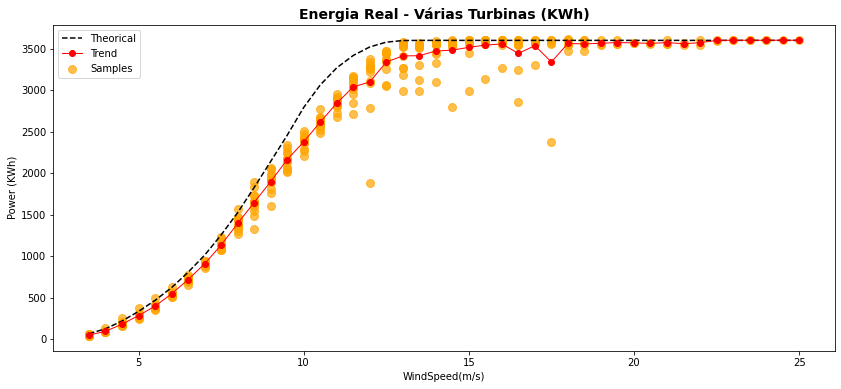

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

data_T_AA = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/T1_reshape.csv')
data_T_AA_mean = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/T1_reshape_mean.csv')

plt.plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["Theoretical_Power_Curve (KWh)"],'--k',label='Theorical')
plt.plot(data_T_AA_mean["WindSpeed(m/s)"],data_T_AA_mean["ActivePower(kW)"], marker='o', color='r', linewidth=1, label='Trend')
plt.scatter(data_T_AA["WindSpeed(m/s)"],data_T_AA["ActivePower(kW)"], marker='o', color='orange',  alpha=0.7, s=64, label='Samples')

plt.title("Energia Real - Várias Turbinas (KWh)", fontsize=14, weight='bold')
plt.ylabel("Power (KWh)")
plt.xlabel("WindSpeed(m/s)")
plt.legend()

plt.show()

Essa linha média ainda pode ser incrementada com uma margem de erro, por exemplo o desvio padrão, permitindo acompanhar a dispersão dos dados ao longo da linha média. Para isso, no lugar do `plot` você pode empregar o comando `plt.errorbar`. 

Vamos empregar isso agora em nosso conjunto de dados da bolsa de valores. Antes, como nossos dados apresentam apenas uma única cotação diária, vamos agregar a cotações e exibir as cotações mensais ao longo dos doze meses da base.



In [ ]:
bovespa['mes'] = bovespa['data'].dt.month
bovespa['mes'] = bovespa['mes'] - 1
bovespa.at[ bovespa['mes'] == 0 , 'mes' ] = 12 

In [ ]:
bovespa.head()

,data,IBOV,VALE3,PETR4,DOLAR,mes
0,2020-02-27,102984.0,9.92,12.08,4.4491,1
1,2020-02-28,104172.0,9.82,12.10,4.4848,1
2,2020-03-02,106625.0,10.27,12.49,4.4413,2
3,2020-03-03,105537.0,10.22,12.16,4.4724,2
4,2020-03-04,107224.0,10.56,12.33,4.5132,2


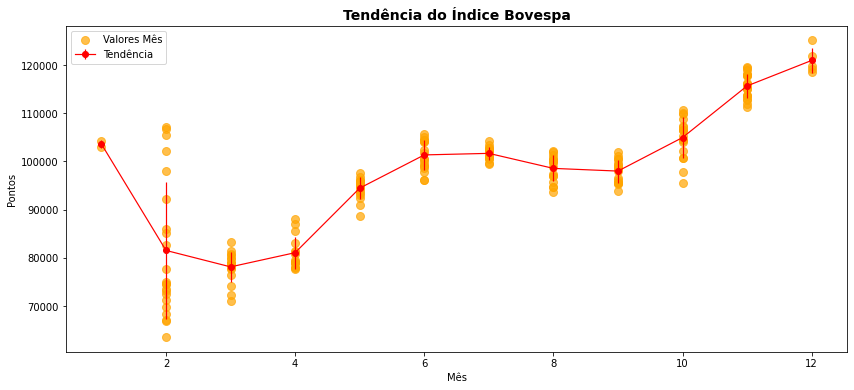

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

yerr = []
ymean = []
for mes in bovespa.mes.unique():
  yerr.append(bovespa[bovespa.mes == mes]['IBOV'].std())
  ymean.append(bovespa[bovespa.mes == mes]['IBOV'].mean())
yerr = np.array(yerr)  
ymean = np.array(ymean) 

plt.errorbar(bovespa.mes.unique(), ymean, yerr=yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

O mesmo procedimento poderia ser feito se tivéssemos cotações diárias do índice e se você já acompanhou gráficos empregados na análise técnica de ações da bolsa no mídia ou nos aplicativos de investimento deve notar semelhança com o gráfico aqui empregado. Embora semelhante, no caso de ações da bolsa é mais comum essa tendência ser acompanhada de gráfico de caixa, ou `boxplot` como abaixo.

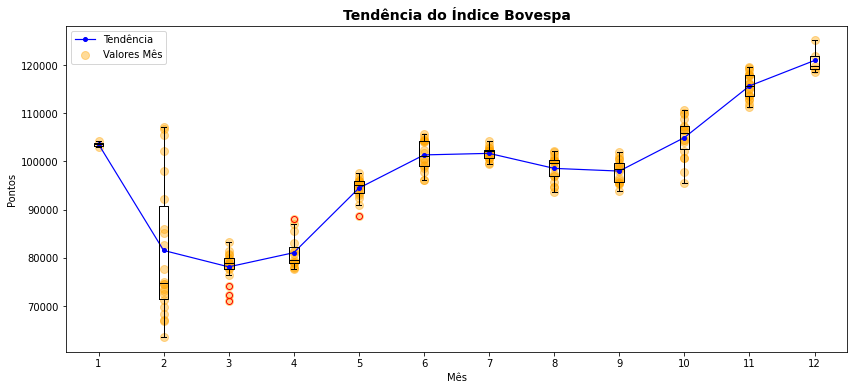

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(bovespa.mes.unique(), ymean, label='Tendência', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='orange', alpha=0.4, s=64)
for mes in bovespa.mes.unique():
  plt.boxplot(bovespa[bovespa.mes == mes].IBOV, positions=[mes], widths=0.15, flierprops=dict(color='r',markeredgecolor='r'),medianprops=dict(color='k'))

plt.title("Tendência do Índice Bovespa", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

O gráficos de caixa foram introduzidos nos anos 70 por John Tukey como uma forma sintética de exibir a distribuição dos dados e vem sendo largamente empregados desde então. Esse e outros gráficos de distribuição é o que estudaremos a seguir.

```{note}
O gráficos de caixa foram introduzidos nos anos 70 por John Tukey como uma forma sintética de exibir a distribuição dos dados e vem sendo largamente empregados desde então.
```


## Cuidado no uso do `plt.plot()`

Um erro bastante comum no uso do `plt.plot()` e que você deve evitar é produzir um gráfico de linha quando há mais de ponto para a mesma coordenada.



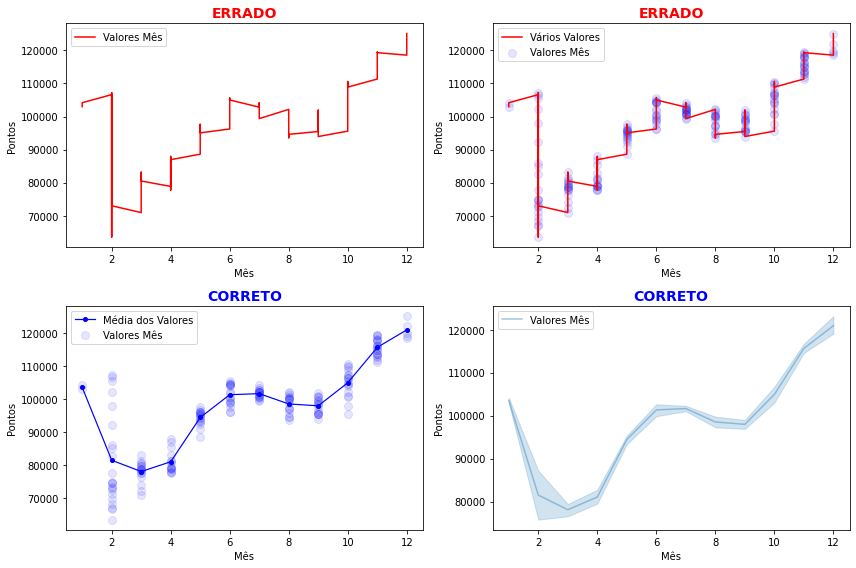

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8),sharex=True,sharey=True)

plt.subplot(2,2,1)

plt.plot(bovespa.mes, bovespa.IBOV, label='Valores Mês', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,2)

plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)
plt.plot(bovespa.mes, bovespa.IBOV, label='Vários Valores', color='r')

plt.title("ERRADO", fontsize=14, weight='bold', color='r')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,3)

plt.plot(bovespa.mes.unique(), ymean, label='Média dos Valores', marker='o', color='b', linewidth=1.2, markersize=4)
plt.scatter(bovespa.mes, bovespa.IBOV, label='Valores Mês', marker='o', color='b', alpha=0.1, s=64)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.subplot(2,2,4)

sns.lineplot(x=bovespa.mes, y=bovespa.IBOV, label='Valores Mês', alpha=0.4)

plt.title("CORRETO", fontsize=14, weight='bold', color='b')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.tight_layout()
plt.show()

O gráfico `plt.plot` do `matplotlib` conecta cada ponto de dados por uma linha e havendo mais de um ponto de dados para uma mesma coordenada o resultado é o que você pode encontrar na figura 1 o que, certamente não é o que você deseja para representar os dados. O erro fica claramente exibido no gráfico 2 que mostra os vários pontos de dados de uma mesma coordenada ligados.

Neste caso você deve empregar o *scatterplot*, fazer um plot da linha média como fizemos anteriormente ou ambos (gráfico 3). O `sns.lineplot` do pacote `seaborn` já tem um comportamento diferente. Ele já exibe por padrão a linha média dos dados e adiciona um intervalo de confiança em torno da média. Quaisquer dessas opções são corretas e podem ser então empregadas.

```{note} 
Não empregue o plt.plot quando existe mais de um valor para a mesma coordenada.
```

Obviamente não é nosso propósito fazer uma análise completa e conclusiva desses dados aqui, mas podemos ter uma ideia das relações entre buscas de termos no Google, a evolução de casos de Covid e seus impactos na Bolsa, e você pode observar aqui o potencial de empregarmos a visualização de dados para entender a evolução desses dados. Vamos então ver alguns instrumentos úteis para melhor a  investigação de dados como esses a partir de gráficos de linha.  O primeiro trata de como adicionarmos linhas de tendência e segundo sobre dados que apresentam se apresentam em diferentes escalas.
